# Scripts for Chapter 2

# Johnson&Johnson Quarterly Earnings

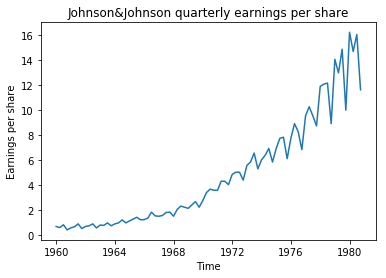

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/DavidArmendariz/"+\
"databases/master/jj.csv"
df=pd.read_csv(url,names=["Dates","Earnings"])
df["Dates"]=pd.to_datetime(df["Dates"],format="%Y-%m-%d")
plt.plot(df["Dates"],df["Earnings"])
plt.xlabel("Time"); plt.ylabel("Earnings per share")
plt.title("Johnson&Johnson quarterly earnings per share")
#plt.savefig("jj.png")
plt.show()

# Monthly pneumonia and influenza deaths in the US

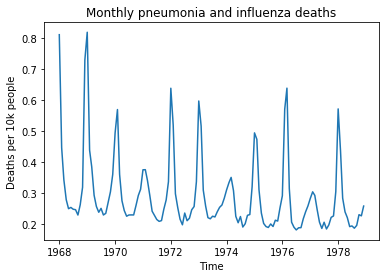

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/DavidArmendariz/"+\
"databases/master/flu.csv"
df=pd.read_csv(url,names=["Dates","Deaths"])
df["Dates"]=pd.to_datetime(df["Dates"],format="%Y-%m-%d")
plt.plot(df["Dates"],df["Deaths"])
plt.xlabel("Time"); plt.ylabel("Deaths per 10k people")
plt.title("Monthly pneumonia and influenza deaths")
#plt.savefig("influenza.png")
plt.show()

# Global mean land-ocean temperature deviations to 2015

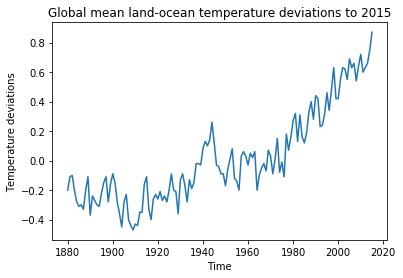

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/DavidArmendariz/"+\
"databases/master/globtemp.csv"
df=pd.read_csv(url,names=["Dates","Deviations"])
df["Dates"]=pd.to_datetime(df["Dates"],format="%Y-%m-%d")
plt.plot(df["Dates"],df["Deviations"])
plt.xlabel("Time"); plt.ylabel("Temperature deviations")
plt.title("Global mean land-ocean temperature deviations")
#plt.savefig("deviations.png")
plt.show()

# Autocovariance coefficient estimates

In [23]:
import numpy as np
def autocov(x,all=True,lag=0):
    n = len(x); coeff = []
    xbar = np.mean(x)
    for k in range(n):
        c = 0
        for i in range(n-k):
            c += (x[i]-xbar)*(x[i+k]-xbar)
        coeff.append(c/n)
    if all==True:
        return np.array(coeff)
    else:
        return coeff[lag]

Fortunately, the package "statsmodels" from Python already has a function that does the same as we did:

In [25]:
from statsmodels.tsa.stattools import acovf

In [26]:
x = np.random.rand(20)
print(autocov(x))
print(acovf(x))

[ 0.06172822 -0.01566974 -0.0071436   0.01487362 -0.00561195  0.01003199
 -0.00043268 -0.01022433  0.00131301 -0.00074279  0.010253   -0.0173508
 -0.00124823  0.00566014 -0.00431187 -0.00310157 -0.00528361 -0.00427695
  0.00290919 -0.00050694]
[ 0.06172822 -0.01566974 -0.0071436   0.01487362 -0.00561195  0.01003199
 -0.00043268 -0.01022433  0.00131301 -0.00074279  0.010253   -0.0173508
 -0.00124823  0.00566014 -0.00431187 -0.00310157 -0.00528361 -0.00427695
  0.00290919 -0.00050694]


In [27]:
def autocorr(x,all=True,lag=0):
    if all==True:
        return (1/autocov(x,all=False))*autocov(x)
    else:
        return (1/autocov(x,all=False))*autocov(x)[lag]

In [31]:
from statsmodels.tsa.stattools import acf

In [32]:
print(autocorr(x))
print(acf(x))

[ 1.         -0.25385053 -0.11572666  0.24095342 -0.09091384  0.16251868
 -0.00700939 -0.16563464  0.02127082 -0.01203317  0.16609901 -0.28108379
 -0.02022141  0.09169449 -0.06985248 -0.05024561 -0.08559476 -0.06928679
  0.04712902 -0.00821238]
[ 1.         -0.25385053 -0.11572666  0.24095342 -0.09091384  0.16251868
 -0.00700939 -0.16563464  0.02127082 -0.01203317  0.16609901 -0.28108379
 -0.02022141  0.09169449 -0.06985248 -0.05024561 -0.08559476 -0.06928679
  0.04712902 -0.00821238]


/home/david/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


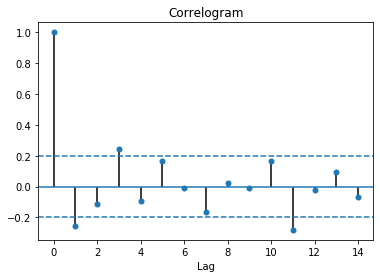

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_acf(x,ax=ax,alpha=None)
ax.set_title("Correlogram")
ax.set_xlabel("Lag")
ax.axhline(y=0.2,linestyle="--")
ax.axhline(y=-0.2,linestyle="--")
#plt.savefig("correlogram1.png")
plt.show()

# Simulation of a random walk
We are going to perform a simulation with:
$$X_0 = 0$$
$$Z_i \sim N(0,1)$$
$$X_t = X_{t-1} + Z_t$$ 

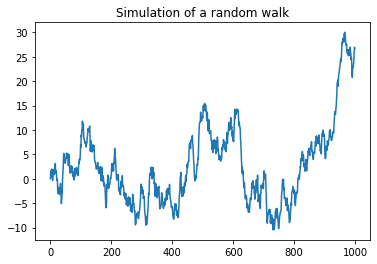

In [84]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000
X = np.zeros(n)
for i in range(1,n):
    X[i] = X[i-1] + np.random.normal()
plt.plot(range(n),X)
plt.title("Simulation of a random walk")
#plt.savefig("randomwalk.png")
plt.show()

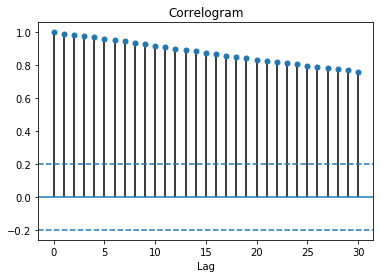

In [80]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_acf(X,ax=ax,alpha=None)
ax.set_title("Correlogram")
ax.set_xlabel("Lag")
ax.axhline(y=0.2,linestyle="--")
ax.axhline(y=-0.2,linestyle="--")
plt.savefig("correlogram2.png")
plt.show()

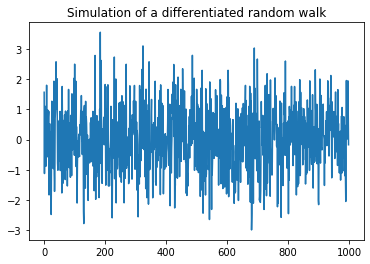

In [85]:
diff = []
for i in range(1,n):
    diff.append(X[i]-X[i-1])
diff = np.array(diff)
plt.plot(range(len(diff)),diff)
plt.title("Simulation of a differentiated random walk")
plt.savefig("differentiated_rw.png")
plt.show()

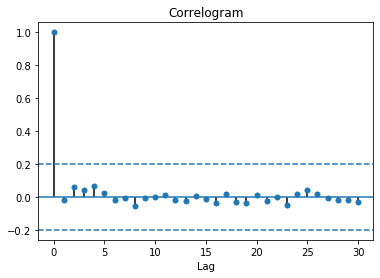

In [87]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_acf(diff,ax=ax,alpha=None)
ax.set_title("Correlogram")
ax.set_xlabel("Lag")
ax.axhline(y=0.2,linestyle="--")
ax.axhline(y=-0.2,linestyle="--")
#plt.savefig("correlogram3.png")
plt.show()

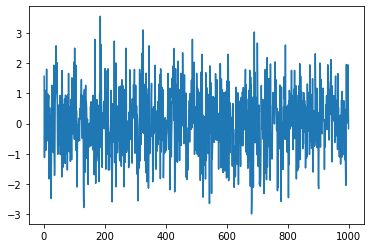

In [91]:
import pandas as pd
ts = pd.Series(X)
diff_ts = ts.diff()
plt.plot(diff_ts)
plt.show()